In [1]:
In [1]: %load_ext autoreload
In [2]: %autoreload 2

In [2]:
from qiskit_experiments.library.stark.tls_spectroscopy import StarkT1, TLSSpectroscopy
from qiskit import IBMQ, schedule
import numpy as np

In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
backend = IBMQ.get_provider(**provider_configs).get_backend("ibmq_bogota")

In [33]:
exp = StarkT1(
    qubit=0,
    delays=np.linspace(10e-6, 100e-6, 5),
    stark_amp=0.2,
    stark_freq_offset=100e6,
    backend=backend,
)

In [34]:
circ1 = exp.circuits()[1]
circ1.draw()

┌───┐ ░ ┌────────────────────┐ ░ ┌─┐
  q: ┤ X ├─░─┤ StarkDelay(146240) ├─░─┤M├
     └───┘ ░ └────────────────────┘ ░ └╥┘
c: 1/══════════════════════════════════╩═
                                       0

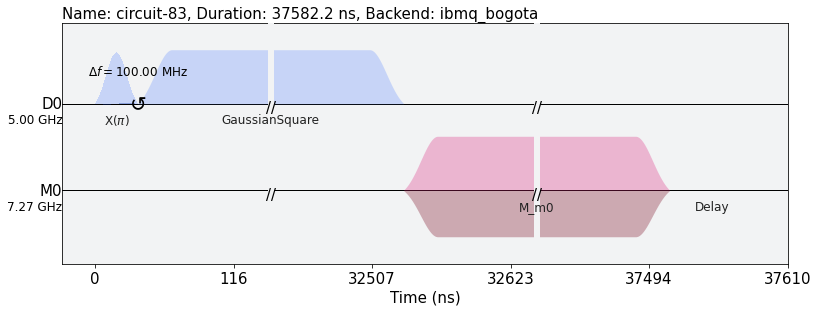

In [35]:
schedule(circ1, backend).draw(backend=backend)

In [36]:
exp = StarkT1(
    qubit=0,
    delays=np.linspace(10e-6, 100e-6, 5),
    stark_amp=-0.2,
    stark_freq_offset=100e6,
    backend=backend,
)

In [37]:
circ1 = exp.circuits()[1]
circ1.draw()

┌───┐ ░ ┌────────────────────┐ ░ ┌─┐
  q: ┤ X ├─░─┤ StarkDelay(146240) ├─░─┤M├
     └───┘ ░ └────────────────────┘ ░ └╥┘
c: 1/══════════════════════════════════╩═
                                       0

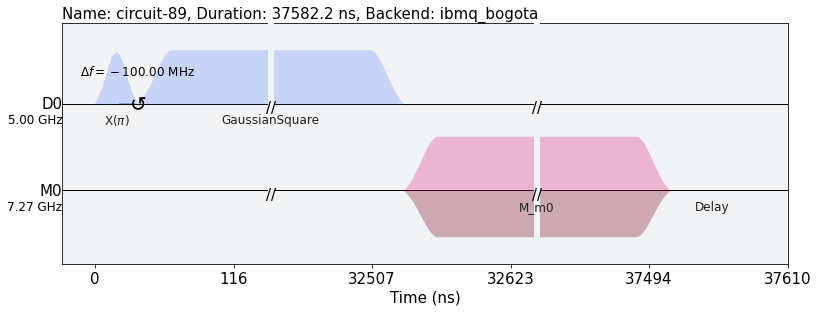

In [38]:
schedule(circ1, backend).draw(backend=backend)

In [41]:
exp = TLSSpectroscopy(
    qubit=0,
    delays=np.linspace(10e-6, 100e-6, 5),
    stark_amps=np.linspace(-0.5, 0.5, 20),
    stark_freq_offset=100e6,
    backend=backend,
)

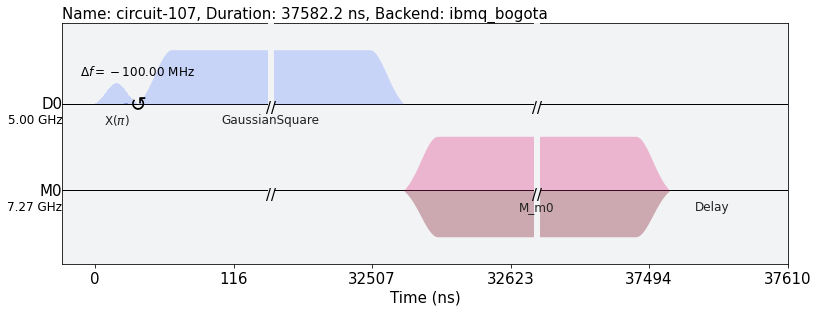

In [44]:
schedule(exp.component_experiment(0).circuits()[1], backend).draw(backend=backend).

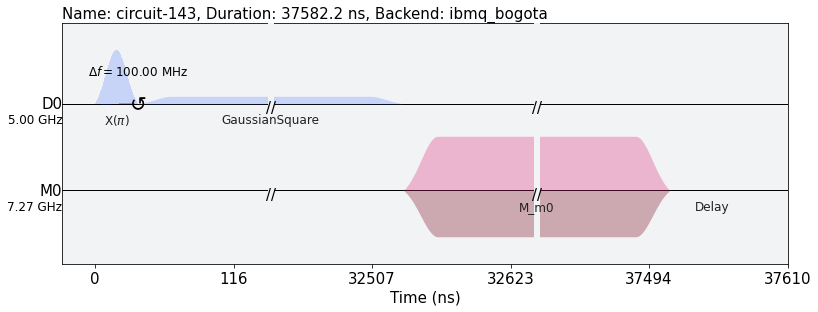

In [54]:
schedule(exp.component_experiment(10).circuits()[1], backend).draw(backend=backend)

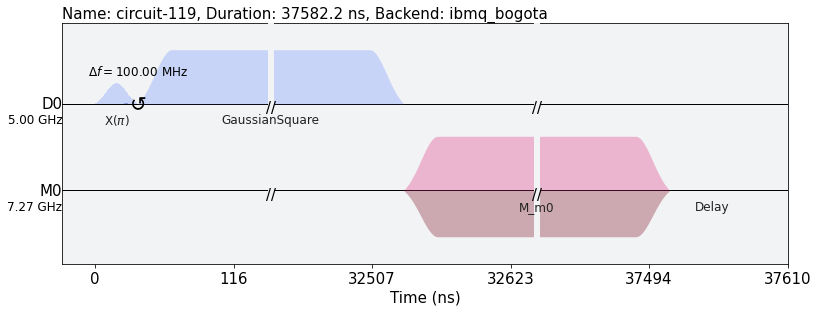

In [49]:
schedule(exp.component_experiment(-1).circuits()[1], backend).draw(backend=backend)